## Import necessary libraries

In [27]:
import os
from glob import glob
from tqdm.notebook import tqdm
import pickle

import cv2
import numpy as np
import matplotlib.pyplot as plt

## Define path of prepared data

In [28]:
classes = ["benign", "malignant", "normal"]

filenames_template = "data/Dataset_BUSI/Dataset_BUSI_with_GT/{}/{} ({})"
class_template = "data/Dataset_BUSI/Dataset_BUSI_with_GT/{}"

saved_directory = "prepared_data"
saved_filename = "image_with_mask_label.pickle"

os.makedirs(saved_directory, exist_ok=True)

In [29]:
total_image = 0
filename_dict = {}
for classe in classes:
    filename_dict[classe] = {}

for classe in classes:
    flag = True
    counter = 1
    
    while flag:
        image_filename = filenames_template.format(classe, classe, counter)
        
        #print(image_filename, os.path.exists(image_filename + ".png"))
        if (not os.path.exists(image_filename + ".png")):
            break
            
        mask_filenames = glob(image_filename + "_*.png")
        
        filename_dict[classe][counter] = [image_filename + ".png", mask_filenames]
        
        counter += 1
        total_image += 1

In [30]:
data = [] 
image_size = (128, 128)

N_labels = {}

for classe in classes:
    print(classe)
    N_labels[classe] = len(filename_dict[classe].keys())
    for counter in tqdm(range(1, N_labels[classe] + 1)):
        filenames = filename_dict[classe][counter]
        
        image = cv2.imread(filenames[0])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, image_size)
        
        mask = np.zeros(image_size)
        for filename in filenames[1]:
            buff = cv2.imread(filename)
            buff = cv2.cvtColor(buff, cv2.COLOR_BGR2GRAY)
            buff = cv2.resize(buff, image_size)
            
            mask += buff
        mask = (mask > 0).astype(np.int8)
        
        
        data.append({"image": image, "mask": mask, "label": classes.index(classe)})

benign


  0%|          | 0/437 [00:00<?, ?it/s]

malignant


  0%|          | 0/210 [00:00<?, ?it/s]

normal


  0%|          | 0/133 [00:00<?, ?it/s]

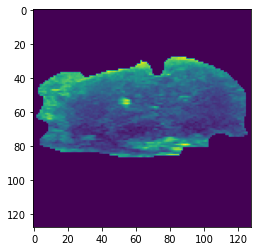

In [36]:
## show a image
index = 437

plt.figure()
plt.imshow(data[index]["image"] * data[index]["mask"])

In [32]:
N_labels # label with the number of data in each class

{'benign': 437, 'malignant': 210, 'normal': 133}

## Save processed image

In [33]:
with open(os.path.join(saved_directory, saved_filename), 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
with open(os.path.join(saved_directory, saved_filename), 'rb') as handle:
    buffer = pickle.load(handle)

In [37]:
len(buffer) # total number of image

780